In [10]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from NeuralNet import NNmodel, predict

In [2]:
#data loading
temp = load_breast_cancer()


df = pd.DataFrame(columns = load_breast_cancer()["feature_names"], data = load_breast_cancer()["data"])
target = load_breast_cancer()["target"]

In [3]:
# Splitting and reshaping
X = np.array(df)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.15, shuffle = True)

X_train = X_train.T
X_test = X_test.T

y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

In [4]:
# layers dimensions
dims_layers = [X_train.shape[0], 50, 20, 5, 1]

In [5]:
# Training

parameters, cost = NNmodel(X = X_train, 
                             Y = y_train, 
                             dims_layers = dims_layers, 
                             num_iterations = 3000, 
                             learning_rate = 0.0075,)

Cost after 0 iterations is 0.6931409444650338
Cost after 10 iterations is 0.692018032547223
Cost after 20 iterations is 0.6909376816247125
Cost after 30 iterations is 0.6898973213855043
Cost after 40 iterations is 0.6888947684913742
Cost after 50 iterations is 0.6879288150506433
Cost after 60 iterations is 0.6869982773496613
Cost after 70 iterations is 0.6861018486476723
Cost after 80 iterations is 0.6852382154306091
Cost after 90 iterations is 0.6844060695209333
Cost after 100 iterations is 0.6836042134245336
Cost after 110 iterations is 0.6828314748999197
Cost after 120 iterations is 0.6820867515908339
Cost after 130 iterations is 0.6813689852311411
Cost after 140 iterations is 0.6806771276771446
Cost after 150 iterations is 0.6800101582545589
Cost after 160 iterations is 0.679367126457643
Cost after 170 iterations is 0.6787470938076062
Cost after 180 iterations is 0.6781491483412614
Cost after 190 iterations is 0.6775724007936147
Cost after 200 iterations is 0.6770159932274623
Cost 

Cost after 1770 iterations is 0.27346798424445384
Cost after 1780 iterations is 0.27237466894052687
Cost after 1790 iterations is 0.2703020364842961
Cost after 1800 iterations is 0.2723282699496766
Cost after 1810 iterations is 0.2659896176808562
Cost after 1820 iterations is 0.2616472924308572
Cost after 1830 iterations is 0.26035274843049194
Cost after 1840 iterations is 0.25992895682139205
Cost after 1850 iterations is 0.2593554551881153
Cost after 1860 iterations is 0.2590378202413085
Cost after 1870 iterations is 0.25829430217149413
Cost after 1880 iterations is 0.2574325028588211
Cost after 1890 iterations is 0.2577272971280416
Cost after 1900 iterations is 0.25657746531844694
Cost after 1910 iterations is 0.25621136802724986
Cost after 1920 iterations is 0.2552214445285146
Cost after 1930 iterations is 0.25652380667335517
Cost after 1940 iterations is 0.2558307444279433
Cost after 1950 iterations is 0.25423529724636856
Cost after 1960 iterations is 0.25280552626450653
Cost after

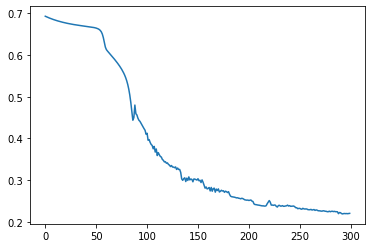

In [7]:
# Plot
plt.plot(cost)

In [6]:
# Great! As the cost is deacreasing on each iteration our model is working!!

In [12]:
# Calculating Acurracy on Train Data

y_pred_train = predict(X_train, parameters)
y_pred_train = y_pred_train.reshape(-1)
y_train = y_train.reshape(-1)


y_pred_train = 1 * (y_pred_train > 0.5)


acc_train = sum(1 * (y_pred_train == y_train)) / len(y_pred_train) * 100

print("Acurracy on Train: " + str(acc_train))

Acurracy on Train: 92.96066252587993


In [13]:
# Train confusion matrix
print(classification_report(y_train, y_pred_train, target_names = ['-', '+']))

              precision    recall  f1-score   support

           -       0.97      0.84      0.90       182
           +       0.91      0.98      0.95       301

    accuracy                           0.93       483
   macro avg       0.94      0.91      0.92       483
weighted avg       0.93      0.93      0.93       483



In [15]:
# Accuracy on Test Data

y_pred_test = predict(X_test, parameters)

y_pred_test = y_pred_test.reshape(-1)
y_test = y_test.reshape(-1)

y_pred_test = 1 * (y_pred_test > 0.5)

acc_test = sum(1 * (y_pred_test == y_test)) / len(y_pred_test) * 100

print("Acurracy on test: " + str(acc_test))

Acurracy on test: 91.86046511627907


In [16]:
# Confusion Matrix on Test

print(classification_report(y_test, y_pred_test, target_names = ['-', '+']))

              precision    recall  f1-score   support

           -       0.96      0.80      0.87        30
           +       0.90      0.98      0.94        56

    accuracy                           0.92        86
   macro avg       0.93      0.89      0.91        86
weighted avg       0.92      0.92      0.92        86

